In [88]:
# import geopandas
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import regex
import country_converter as coco
import warnings
warnings.filterwarnings("ignore")
salary=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module2\Project_Week5\ds_salaries.csv")
salary.drop(["Unnamed: 0"], axis=1, inplace=True)
standard_names_empl = coco.convert(salary['employee_residence'], to='name')
salary['employee_residence'] = standard_names_empl
standard_names_comp = coco.convert(salary['company_location'], to='name')
salary['company_location'] = standard_names_comp
salary['experience_level'] = salary['experience_level'].replace({'EN':'Entry-Level', 'MI':'Mid-Level', 'SE':'Senior-Level', 'EX':'Executive-Level/Director'})
salary['company_size'] = salary['company_size'].replace({'S':'Small (<50)', 'M':'Medium (50-250)', 'L':'Large (250+)'})
salary['employment_type'] = salary['employment_type'].replace({'FT':'Full-time', 'PT':'Part-time', 'CT':'Contract', 'FL':'Freelance'})
salary.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-time,Data Scientist,70000,EUR,79833,Germany,0,Germany,Large (250+)
1,2020,Senior-Level,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,Small (<50)
2,2020,Senior-Level,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,50,United Kingdom,Medium (50-250)


In [ ]:
x=salary.pivot_table(index=["employee_residence","job_title"], values=['employee_residence'], aggfunc=pd.Series.nunique)
x

In [ ]:
salary.groupby(['employee_residence',"job_title"]).agg({'job_title':'count'})
#index=["employee_residence","job_title"], values=['employee_residence'], aggfunc=pd.Series.nunique)

In [44]:
#locations = salary['employee_residence'].unique().tolist()
#sidebar = st.sidebar
#select_loc = sidebar.selectbox("Select Country",locations)
#st.dataframe(test.groupby(["employment_type"]).agg({"employment_type":"count"}))
sel_country=salary[salary['employee_residence']=='Germany']            
x=sel_country.groupby(['employee_residence',"job_title"]).agg(Number_of_jobs=('job_title', 'count'))
x

Number_of_jobs
employee_residence job_title                                        
Germany            Computer Vision Software Engineer               1
                   Data Analyst                                    1
                   Data Analytics Engineer                         1
                   Data Engineer                                   2
                   Data Engineering Manager                        1
                   Data Science Consultant                         3
                   Data Scientist                                  7
                   Director of Data Science                        2
                   Lead Machine Learning Engineer                  1
                   ML Engineer                                     1
                   Machine Learning Engineer                       2
                   Principal Data Scientist                        3

array([<AxesSubplot:ylabel='Number_of_jobs'>], dtype=object)

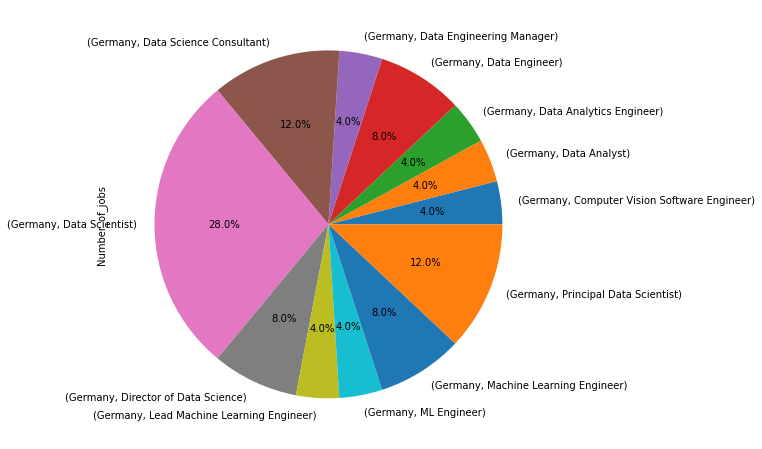

In [78]:
x.plot(kind="pie", figsize=(9, 8), legend=None, subplots=True, autopct='%1.1f%%')

In [77]:
import plotly.graph_objects as go

ValueError: x must be 1D

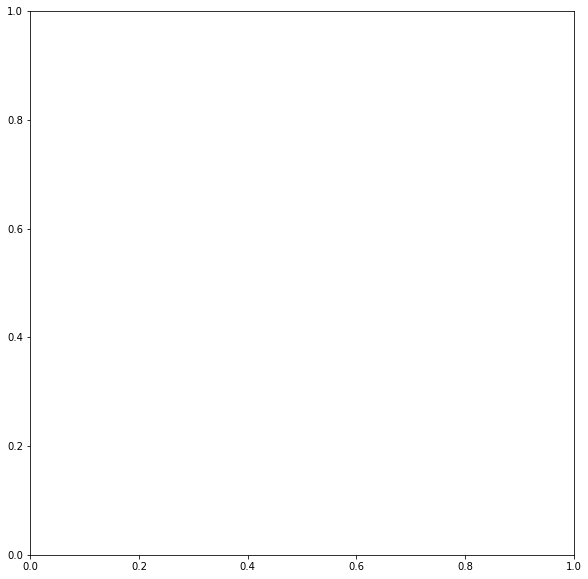

In [94]:
labels = ["a", "b", "c"]
sizes = [100, 200, 50]

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(x, labels=labels, autopct="%1.1f%%")
ax.axis("equal")

st.pyplot(fig)

In [81]:
salary['company_size']

0         Large (250+)
1          Small (<50)
2      Medium (50-250)
3          Small (<50)
4         Large (250+)
            ...       
602    Medium (50-250)
603    Medium (50-250)
604    Medium (50-250)
605    Medium (50-250)
606       Large (250+)
Name: company_size, Length: 607, dtype: object